In [1]:
import numpy as np
import umap
import matplotlib.pyplot as plt
from collections import Counter
import anndata as ad
import seaborn as sns
import pandas as pd
from sklearn.metrics import calinski_harabasz_score

/opt/anaconda3/envs/scvi-env-arm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
exp_id = "final_final"

In [3]:
adata_input_dir = f"/Users/apple/Desktop/KB/data/LarryData/Larry_simulation/Larry_simulation_4scvi/{exp_id}"
#simulation data
adata_01 = ad.read_h5ad(adata_input_dir+f'/adata_scvi_sim01_{exp_id}.h5ad')
lineage_label_01 = adata_01.obs["clone_id"].to_numpy()

adata_03 = ad.read_h5ad(adata_input_dir+f'/adata_scvi_sim03_{exp_id}.h5ad')
lineage_label_03 = adata_03.obs["clone_id"].to_numpy()

adata_05 = ad.read_h5ad(adata_input_dir+f'/adata_scvi_sim05_{exp_id}.h5ad')
lineage_label_05 = adata_05.obs["clone_id"].to_numpy()

adata_07 = ad.read_h5ad(adata_input_dir+f'/adata_scvi_sim07_{exp_id}.h5ad')
lineage_label_07 = adata_07.obs["clone_id"].to_numpy()

adata_09 = ad.read_h5ad(adata_input_dir+f'/adata_scvi_sim09_{exp_id}.h5ad')
lineage_label_09 = adata_09.obs["clone_id"].to_numpy()

In [4]:
adata_01.obs['Cell type annotation'] = adata_01.obs["state_info"]
adata_03.obs['Cell type annotation'] = adata_03.obs["state_info"]
adata_05.obs['Cell type annotation'] = adata_05.obs["state_info"]
adata_07.obs['Cell type annotation'] = adata_07.obs["state_info"]
adata_09.obs['Cell type annotation'] = adata_09.obs["state_info"]

In [5]:
input_dir = f"/Users/apple/Desktop/KB/data/feat_simulation/scvi_sim_result/{exp_id}"
output_dir = "/Users/apple/Desktop/KB/SCSeq_LineageBarcoding2/SCSeq_LineageBarcoding/SCLineage_ConstrativeLearning/out/plot/feat_simulation"

# scVI
x_005_01 = np.load(input_dir+f"/scVI/Larry_scvi_sim_01_{exp_id}.npy")
x_005_03 = np.load(input_dir+f"/scVI/Larry_scvi_sim_03_{exp_id}.npy")
x_005_05 = np.load(input_dir+f"/scVI/Larry_scvi_sim_05_{exp_id}.npy")
x_005_07 = np.load(input_dir+f"/scVI/Larry_scvi_sim_07_{exp_id}.npy")
x_005_09 = np.load(input_dir+f"/scVI/Larry_scvi_sim_09_{exp_id}.npy")

#scCL

# x_CL_01 = np.load(input_dir+f"/scCL/Larry_scCL_sim_01_{exp_id}.npy")
# x_CL_03 = np.load(input_dir+f"/scCL/Larry_scCL_sim_03_{exp_id}.npy")
# x_CL_05 = np.load(input_dir+f"/scCL/Larry_scCL_sim_05_{exp_id}.npy")
# x_CL_07 = np.load(input_dir+f"/scCL/Larry_scCL_sim_07_{exp_id}.npy")
# x_CL_09 = np.load(input_dir+f"/scCL/Larry_scCL_sim_09_{exp_id}.npy")


In [ ]:
# adata_beta_01.write("Larry_Simulation_01_exp7.h5ad")
# adata_beta_03.write("Larry_Simulation_03_exp7.h5ad")
# adata_beta_05.write("Larry_Simulation_05_exp7.h5ad")
# adata_beta_07.write("Larry_Simulation_07_exp7.h5ad")
# adata_beta_09.write("Larry_Simulation_09_exp7.h5ad")

### Calinski Scores

In [6]:
# scVI
score_005_01 = calinski_harabasz_score(x_005_01, lineage_label_01)
score_005_03 = calinski_harabasz_score(x_005_03, lineage_label_03)
score_005_05 = calinski_harabasz_score(x_005_05, lineage_label_05)
score_005_07 = calinski_harabasz_score(x_005_07, lineage_label_07)
score_005_09 = calinski_harabasz_score(x_005_09, lineage_label_09)

# scCL
# score_CL_01 = calinski_harabasz_score(x_CL_01, lineage_label_01)
# score_CL_03 = calinski_harabasz_score(x_CL_03, lineage_label_03)
# score_CL_05 = calinski_harabasz_score(x_CL_05, lineage_label_05)
# score_CL_07 = calinski_harabasz_score(x_CL_07, lineage_label_07)
# score_CL_09 = calinski_harabasz_score(x_CL_09, lineage_label_09)

In [7]:
score_005_01, score_005_03, score_005_05, score_005_07, score_005_09

(69.60130986543756,
 94.49685632631221,
 114.16875889087285,
 147.03415984462424,
 216.56895907067485)

### Final_Final

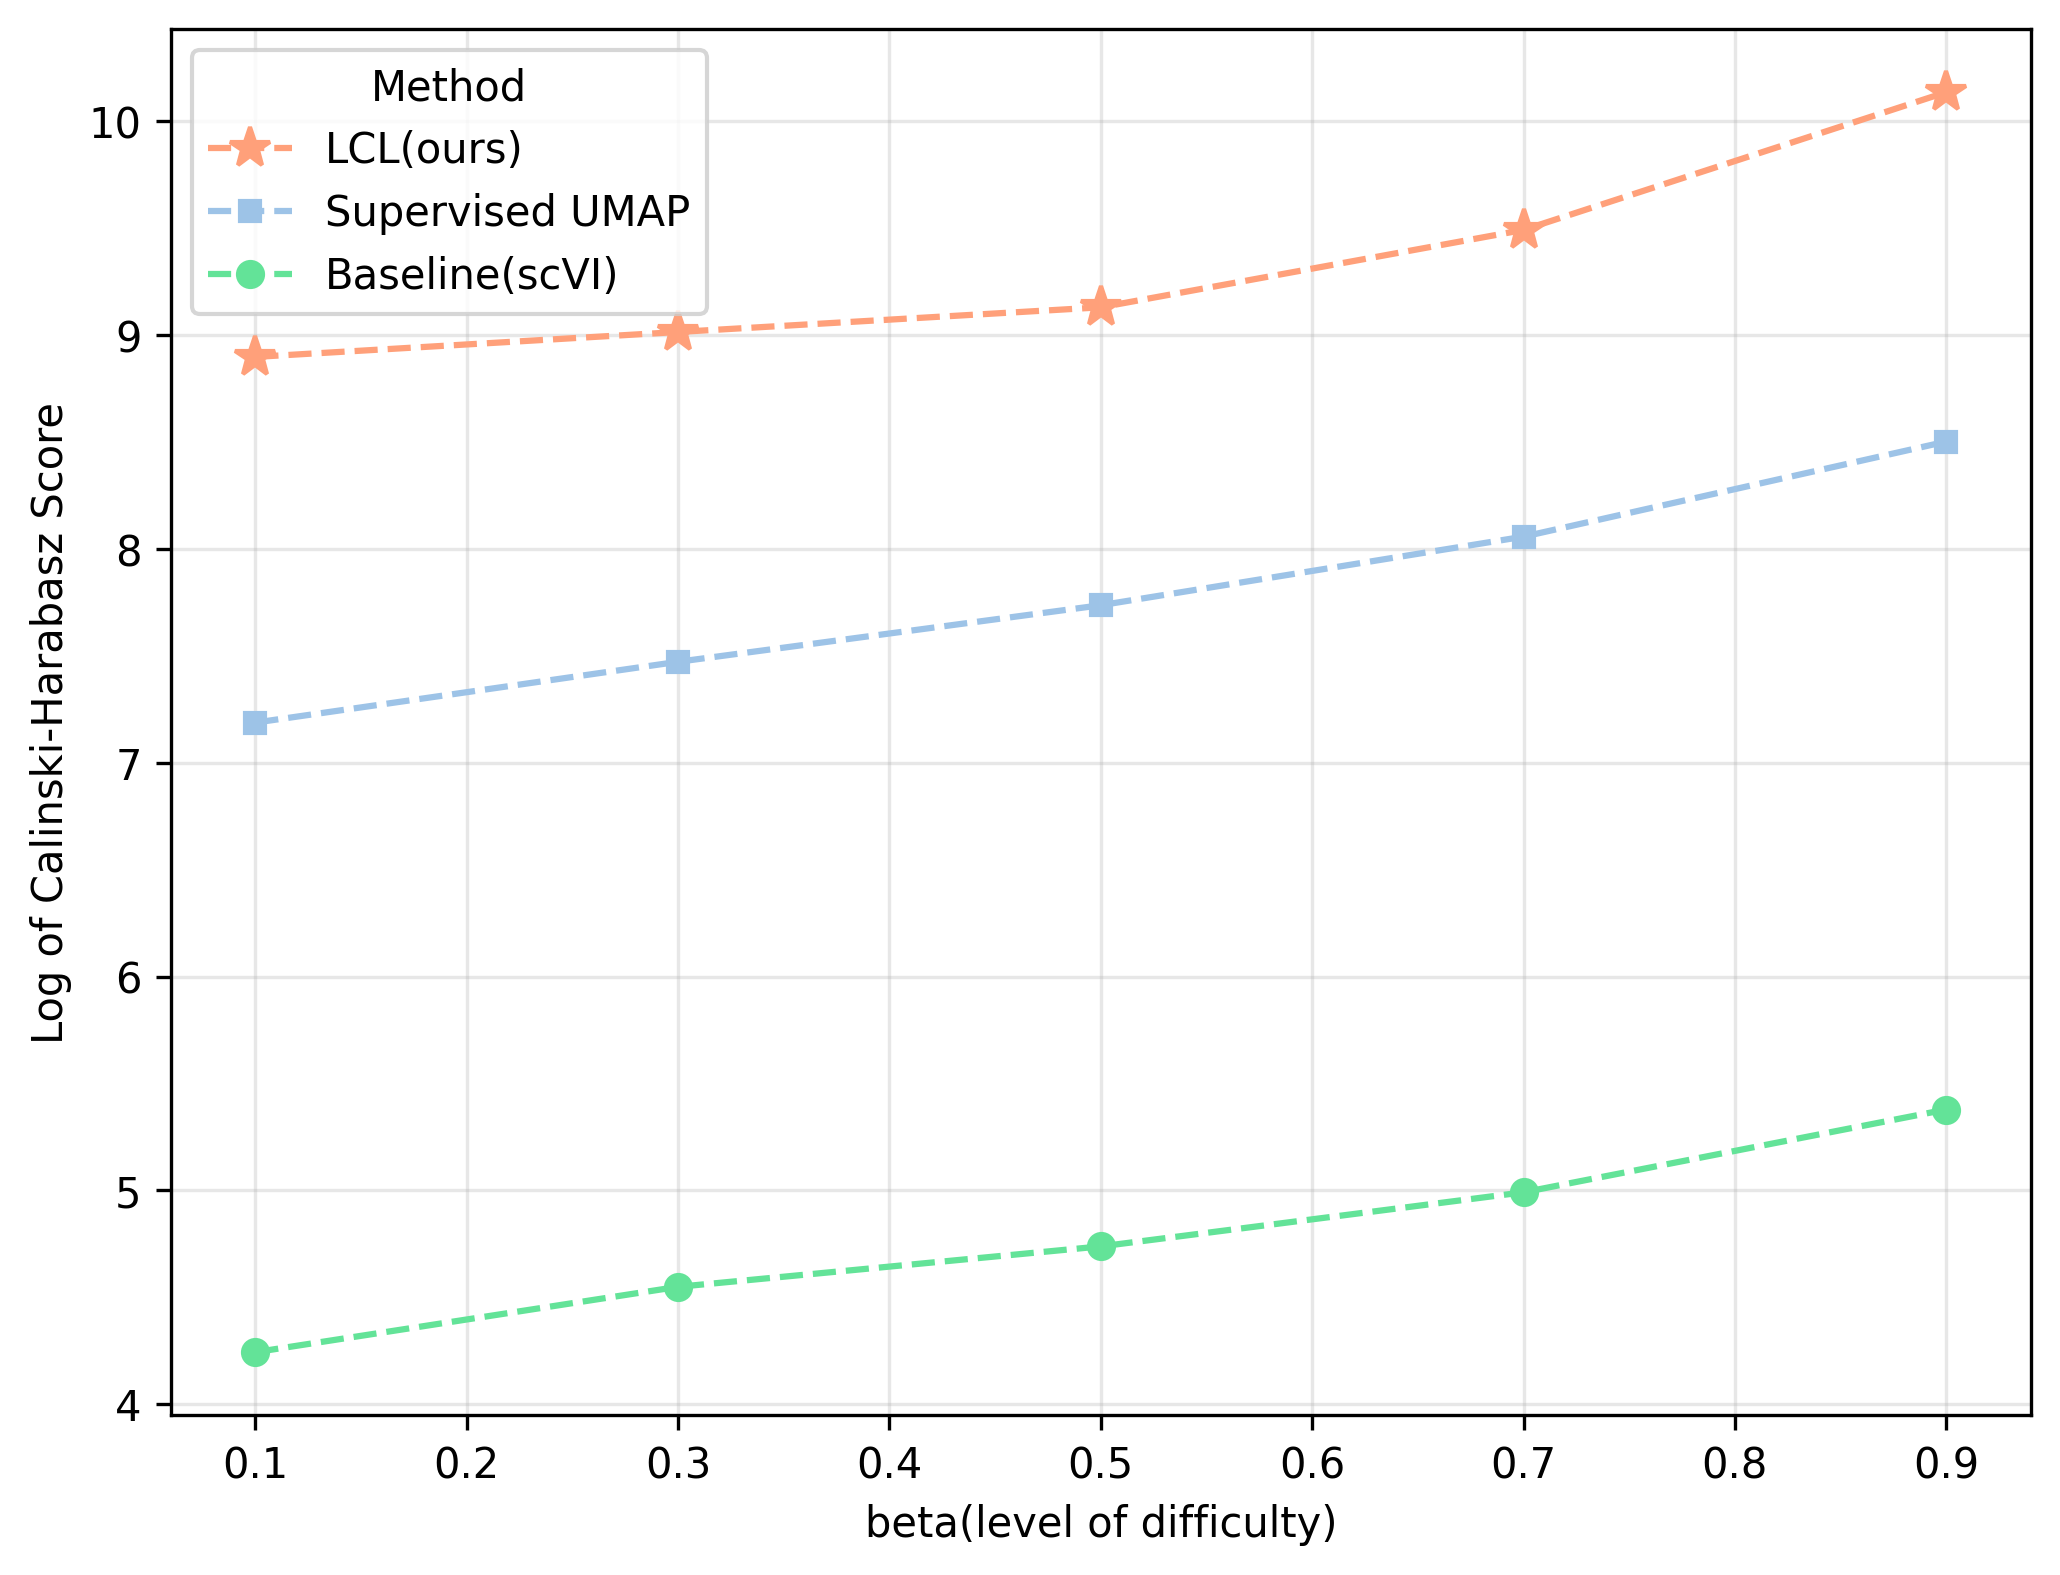

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data for plotting
data = {
    'beta(level of difficulty)': [0.1, 0.3, 0.5, 0.7, 0.9] * 3,
    'Score': [
        np.log(69.60), np.log(94.49), np.log(114.16), np.log(147.034), np.log(216.56),  # Baseline(scVI) scores
        np.log(1323.14), np.log(1758.58), np.log(2291.23), np.log(3157.54), np.log(4925.97),  # supervised UMAP scores
        np.log(7320.011), np.log(8225.45), np.log(9232.24), np.log(13258.8), np.log(25254.68)  # scCL(ours) scores
    ],
    'Method': ['Baseline(scVI)'] * 5 + ['Supervised UMAP'] * 5 + ['LCL(ours)'] * 5
}

'''
1323.1478213266537
1758.5884080309918
2291.238617503212
3157.5489004410033
4925.97944441121

'''


df = pd.DataFrame(data)

# Separate the data for each method
scvi_data = df[df['Method'] == 'Baseline(scVI)']
umap_data = df[df['Method'] == 'Supervised UMAP']
lcl_data = df[df['Method'] == 'LCL(ours)']

# Plotting
plt.figure(figsize=(8, 6), dpi=300)

# Plot each method separately with customized marker sizes
plt.plot(lcl_data['beta(level of difficulty)'], lcl_data['Score'], marker='*', linestyle='--', color="#FFA07A", markersize=10, label='LCL(ours)')
plt.plot(umap_data['beta(level of difficulty)'], umap_data['Score'], marker='s', linestyle='--', color="#9DC3E7", markersize=5, label='Supervised UMAP')
plt.plot(scvi_data['beta(level of difficulty)'], scvi_data['Score'], marker='o', linestyle='--', color="#63E398", markersize=6, label='Baseline(scVI)')



# Add grid
plt.grid(True, alpha=0.3)

# Set plot title and labels
# plt.title('Comparison of scVI, scCL, and Supervised UMAP at Different Thresholds (Log Scale)')
plt.xlabel('beta(level of difficulty)')
plt.ylabel('Log of Calinski-Harabasz Score')

# Customize the legend
plt.legend(title='Method')

# Show the plot
plt.show()


### Final